<a href="https://colab.research.google.com/github/HitanshKhosla/Face-Mask-Detection-CNN/blob/main/Face_Mask_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'face-mask-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F667889%2F1176415%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240816%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240816T170927Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D62985ae2ff696c12a13c84efc5309a85abebcd16ff2e8c471922a1942de83b04da85901760b5307fa39e166c66afa8ffca305a68a7b1c7364c9eb46a9ad78bd71564435e62c168fc86eda18722c301f456ce367f68fbf9ac03ba71659bff6eb70df45cb26237480882c72f2a8a80b09a512c30bc8e29d19e141175dca75cea05ed2c85dddf0599b9f98194db0d63901bf84a0c5b586967649f6259a3c43853380619349183aad24ede230f1a0eda7e7f880f4d8d8b7b133de79fedecdbf749187e8284864920434258e750c7df0e55ce0bd4982063535640af68842902024dedc8b8f762a6e1bd82cd8357c6a9cf141c42ac1a3ddbd8c87191f9b72e661bf6db,face-mask-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F809358%2F1386555%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240816%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240816T170928Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D05a1466588bc70093451fca28387642e0c9c531c962e150a4ad22a0650f5bc5d7e2b209767a4237eea60321b9c7b03999c428457db03948e227de647464c68f63e30b67cb9eea0fae7919c39b8f1a5582e025edb4c03f5053e76342447080037eb0992a03aa720e54602ac1f6d1f06dff961f469d1c0c274df2de62b071b8775edc4e68b6d012d02f35b128f1e91d8127f1148e63fa490d0b9ce3e61398e13af0ec8694e0b0d103413b848b36f6e48f19307626949a36ac5fc5da8ea47965795cdd50d945463082247dbc26f9c02d40dbdab4f03cfbddc965cc46afe41dd4902d7a29db6fccd1e92f3741ce7c3f93b257037cfa1e5996d12a7327081a3866208'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 416968083 bytes downloaded
Downloaded and uncompressed: face-mask-detection
[==================================================] 171127690 bytes downloaded
Downloaded and uncompressed: face-mask-dataset
Data source import complete.


In [2]:
import os
path,dirs,filenames=next(os.walk('/kaggle/input/face-mask-dataset/data/with_mask'))
file_count=len(filenames)
print(file_count)

path,dirs,filenames=next(os.walk('/kaggle/input/face-mask-dataset/data/without_mask'))
file_count_without_mask=len(filenames)
print(file_count_without_mask)
print("The Total No of Images :",file_count+file_count_without_mask)



3725
3828
The Total No of Images : 7553


In [3]:
list=os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')
list[-5:]

['with_mask_3586.jpg',
 'with_mask_637.jpg',
 'with_mask_2068.jpg',
 'with_mask_2227.jpg',
 'with_mask_1351.jpg']

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

(102, 80, 3)
AxesImage(size=(102, 80))


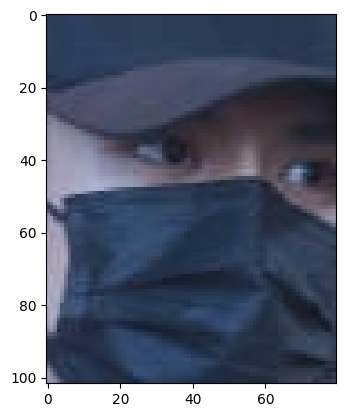

In [5]:
dataset='/kaggle/input/face-mask-dataset/data/with_mask/'
img=mpimg.imread(dataset+'with_mask_1083.jpg')
print(img.shape)
img=plt.imshow(img)
print(img)

In [6]:
with_mask=os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')
without_mask=os.listdir('/kaggle/input/face-mask-dataset/data/without_mask')
with_mask_labels=[1]*len(with_mask)
without_mask_labels=[0]*len(without_mask)
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [7]:
labels=with_mask_labels+without_mask_labels
print(len(labels))

7553


numpy.ndarray

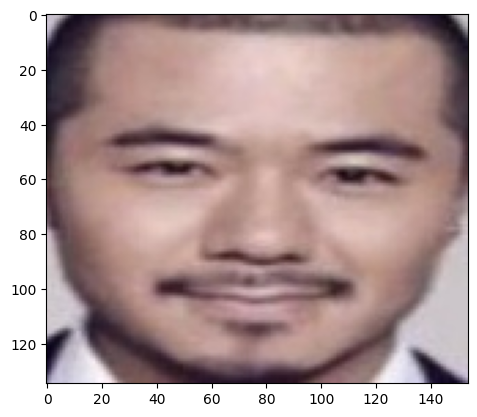

In [8]:
img_path='/kaggle/input/face-mask-dataset/data/without_mask/without_mask_10.jpg'
img_without_mask=mpimg.imread(img_path)
plt.imshow(img_without_mask)
type(img_without_mask)

In [9]:
with_mask='/kaggle/input/face-mask-dataset/data/with_mask/'
data=[]
for i in list:
    img=Image.open(with_mask+i)
    img=img.resize((128,128))
    img=img.convert('RGB')
    img=np.array(img)
    data.append(img)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [10]:
without_mask='/kaggle/input/face-mask-dataset/data/without_mask/'
list1=os.listdir(without_mask)
for i in list1:
    img=Image.open(without_mask+i)
    img=img.resize((128,128))
    img=img.convert('RGB')
    img=np.array(img)
    data.append(img)

In [11]:
len(data)
print(data[0])

[[[144 124  98]
  [153 134 110]
  [167 150 126]
  ...
  [245  61  97]
  [245  63  97]
  [243  62  95]]

 [[125 107  83]
  [131 113  90]
  [142 125 102]
  ...
  [243  62  97]
  [242  63  96]
  [241  62  94]]

 [[154 137 116]
  [156 139 118]
  [157 141 121]
  ...
  [238  62  95]
  [235  61  93]
  [233  61  91]]

 ...

 [[253 246 226]
  [251 241 222]
  [248 235 216]
  ...
  [113  32  41]
  [120  35  44]
  [121  36  44]]

 [[251 240 218]
  [250 236 216]
  [247 230 209]
  ...
  [127  35  46]
  [134  39  50]
  [137  40  51]]

 [[249 234 214]
  [248 232 210]
  [245 226 204]
  ...
  [135  39  50]
  [143  42  54]
  [145  43  54]]]


In [12]:
type(data[0])

numpy.ndarray

In [13]:
data[0].shape

(128, 128, 3)

In [14]:
#converting the list data and labels list into numpy array
X=np.asarray(data)
Y=np.asarray(labels)

In [15]:
X.shape

(7553, 128, 128, 3)

In [16]:
Y.shape

(7553,)

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)

In [18]:
X_train.shape

(5287, 128, 128, 3)

In [19]:
X_test.shape

(2266, 128, 128, 3)

In [20]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [21]:
X_train_scaled[0]

array([[[0.90196078, 0.76078431, 0.81568627],
        [0.87843137, 0.7372549 , 0.78431373],
        [0.80392157, 0.6745098 , 0.70980392],
        ...,
        [0.12941176, 0.06666667, 0.07058824],
        [0.1254902 , 0.06666667, 0.07843137],
        [0.1254902 , 0.06666667, 0.07843137]],

       [[0.90980392, 0.76862745, 0.81568627],
        [0.8627451 , 0.72156863, 0.76862745],
        [0.74117647, 0.61176471, 0.63921569],
        ...,
        [0.12156863, 0.05882353, 0.0627451 ],
        [0.11764706, 0.05882353, 0.07058824],
        [0.12156863, 0.0627451 , 0.0745098 ]],

       [[0.9254902 , 0.78431373, 0.81960784],
        [0.81568627, 0.68235294, 0.70588235],
        [0.65098039, 0.5254902 , 0.54117647],
        ...,
        [0.11764706, 0.05490196, 0.06666667],
        [0.12156863, 0.05882353, 0.07058824],
        [0.12156863, 0.05882353, 0.07058824]],

       ...,

       [[0.88235294, 0.81960784, 0.81960784],
        [0.88235294, 0.81960784, 0.81960784],
        [0.88235294, 0

In [22]:
import tensorflow as tf
from tensorflow import keras

In [23]:
no_classes=2
model=tf.keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),input_shape=(128,128,3),activation='relu')),
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)),

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))),
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))

model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(no_classes,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [25]:
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=50)

Epoch 1/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - acc: 0.7108 - loss: 0.6229 - val_acc: 0.8866 - val_loss: 0.3140
Epoch 2/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - acc: 0.8693 - loss: 0.3336 - val_acc: 0.8941 - val_loss: 0.2492
Epoch 3/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - acc: 0.9016 - loss: 0.2487 - val_acc: 0.9225 - val_loss: 0.1882
Epoch 4/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - acc: 0.9374 - loss: 0.1760 - val_acc: 0.9130 - val_loss: 0.2127
Epoch 5/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - acc: 0.9350 - loss: 0.1654 - val_acc: 0.9414 - val_loss: 0.1641
Epoch 6/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - acc: 0.9444 - loss: 0.1555 - val_acc: 0.9376 - val_loss: 0.1864
Epoch 7/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - acc: 0.9530 - loss: 0.1179 - val_acc: 0.9395 - val_loss: 0.1778
Epoch 8/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - acc: 0.9597 - loss: 0.1098 - val_acc: 0.9471 - val_loss: 0.2265
Epoch 9/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 30m

In [26]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print(loss)
print(accuracy*100)

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - acc: 0.9202 - loss: 0.4540
0.4430985748767853
92.89497137069702


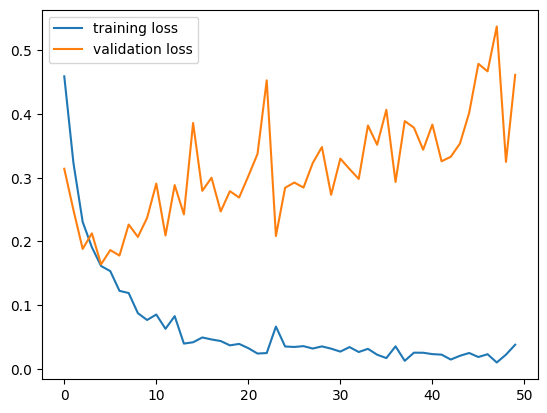

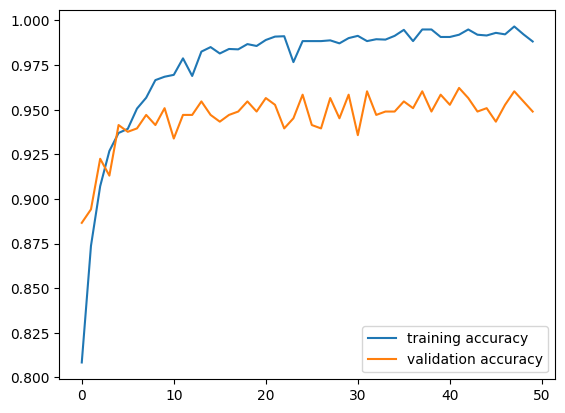

In [27]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'],label='training accuracy')
plt.plot(history.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

Enter the Path of the Image/content/maksssksksss124.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step
[[1.1981106e-08 1.0000000e+00]]
Person is Wearing Mask


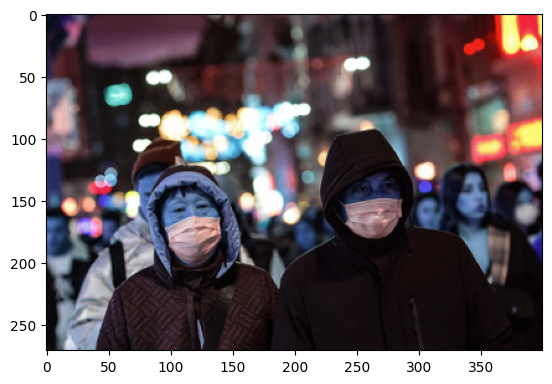

In [28]:
image=input('Enter the Path of the Image')
img=cv2.imread(image)
plt.imshow(img)
img=cv2.resize(img,(128,128))
scaled_image=img/255
reshaped_image=np.reshape(scaled_image,[1,128,128,3])
prediction=model.predict(reshaped_image)
prediction_label=np.argmax(prediction)
print(prediction)
if prediction_label==0:
    print('Person is not Wearing mask')
else:
    print("Person is Wearing Mask")

